In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import re
import matplotlib.pyplot as plt

# TO DO

1. Relancer nouvelle version scraper 
2. Clean proprement le texte avec les bons stopwords
3. Ajouter les variables Honore's , Simpson, F-measure
4. Sentiment analysis
5. POS taging optimisation temps traitement?

# Importation des différentes données

In [9]:
prenoms = pd.read_csv('nat2018.csv',sep=';')
prenoms=prenoms.groupby(['preusuel','sexe'],as_index=False).sum()
prenoms=prenoms.sort_values(['nombre'],ascending=True)
prenoms=prenoms.drop_duplicates(subset=['preusuel'],keep='last')
prenoms=prenoms[['preusuel','sexe']]
df = pd.read_csv('scraper/scraper/discours2.csv')
df.Nom = df.Nom.map(str).apply(lambda x : x.replace(","," "))
df.Titre = df.Titre.apply(lambda x:re.sub('  +', '',x))
df.Fonction= df.Fonction.map(str).apply(lambda x : x[1:])
df['Type'] = df.Titre.apply(lambda x:x.split(' ')[0].lower())
df = df[df.Texte.notna()]
df['PRENOM']=df.Prenom.map(str).apply(lambda x:x.upper())
df = pd.merge(df,prenoms,how='left',left_on='PRENOM',right_on='preusuel')
df.drop(['preusuel','PRENOM'],axis=1,inplace=True)
subdf = df[(df.Type == 'déclaration') | (df.Type == 'discours')]

# Analyse des différentes variables hors texte

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

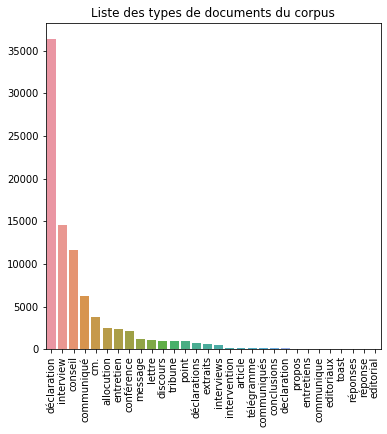

In [3]:
plt.figure(figsize=(6,6))
sns.barplot(x = df.Type.value_counts().head(30).index,y = df.Type.value_counts().head(30).values)
plt.title('Liste des types de documents du corpus')
plt.xticks(rotation=90)

In [4]:
df.sexe.fillna(0,inplace=True)

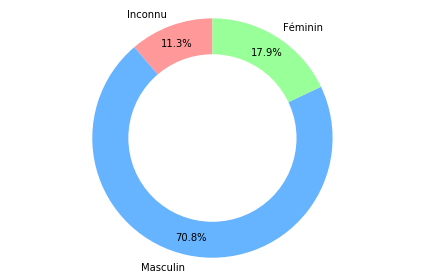

In [5]:
labels = ['Inconnu','Masculin','Féminin']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sizes = [0.112789, 0.707715,0.179496]
fig, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [6]:
df.Fonction.value_counts().head(5)

an                                                 85476
Ministre de l'Europe et des affaires étrangères      263
Président de la République                           148
Ministre de l'économie et des finances               141
Premier ministre                                     124
Name: Fonction, dtype: int64

# Concentration sur les discours et sur les déclarations

In [10]:
subdf.sexe.fillna(0,inplace=True)
subdf.sexe.value_counts()

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


1.0    27056
2.0     8910
0.0     1447
Name: sexe, dtype: int64

In [23]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stopWords = set(stopwords.words('french'))

In [50]:
woman = np.array(Image.open("alice.png"))
wc = WordCloud(background_color="white", max_words=100, mask=woman,
               stopwords=stopWords, contour_width=1, contour_color='black')
corpus_f = ' '.join(subdf[subdf.sexe == 2].Texte)
wc.generate(corpus_f)

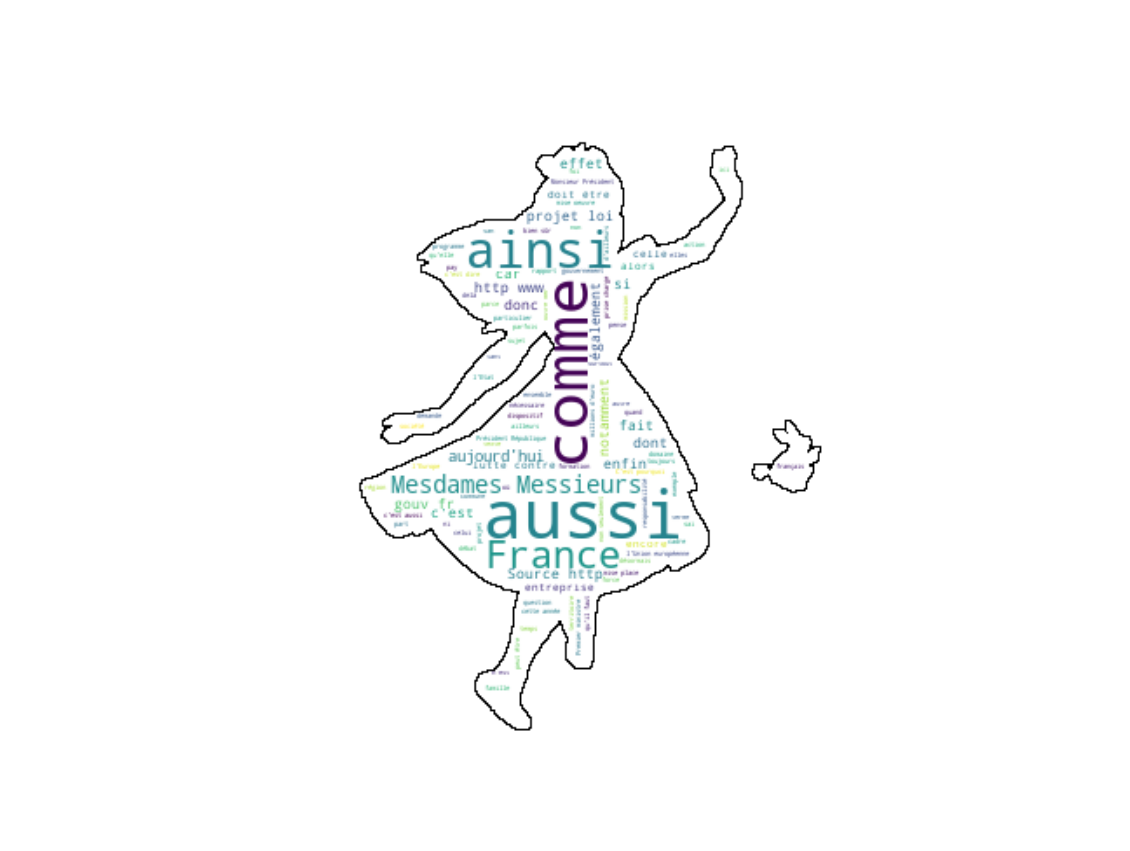

In [72]:
plt.figure(figsize=[20,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Il semble qu'il existe beaucoup trop de bruit et de mots n'apportant pas grand chose dans les tops. Il va falloir cleaner. Par exemple, beaucoup de déclaration ou discours on une source : http ...  Je dois reclean mes données, comme un con j'ai pris un mauvais tokennizer pour le texte, il sépare en deux les aujourd'hui , l'autre etc... 

Il faut aussi que j'élimine les Source http à la fin du texte ! C'est corrigé dans la nouvelle version du scrapper que je ferais tourner demain. Le texte n'est pas assez propre

In [11]:
data = pd.read_csv('baseF.csv')

In [12]:
data.head(5)

,Unnamed: 0,sexe,Texte,NbCarac,NbPhrases,Token,NbPunct,NbWord,UniqueWord,UniqueWordTx,NbStopWords,Hapaxlegomena,Hapaxdislegomena,YuleK
0,0,1.0,"Monsieur le Ministre,Mes chers collègues,Mesda...",17256,27,"['monsieur', 'le', 'ministre', 'mes', 'chers',...",468,2820,978,0.346809,1154,675,140,99.014134
1,1,1.0,"Monsieur le Président,Mesdames et Messieurs le...",1611,8,"['monsieur', 'le', 'président', 'mesdames', 'e...",29,282,168,0.595745,126,124,23,79.975856
2,2,1.0,"Mesdames et Messieurs, J'ai présidé aujourd'hu...",12075,82,"['mesdames', 'et', 'messieurs', ""j'"", 'ai', 'p...",198,1941,717,0.369397,801,483,109,91.206830
3,3,2.0,"Messieurs les chefs d'état-major,Madame et mes...",3225,3,"['messieurs', 'les', 'chefs', ""d'"", 'état', 'm...",69,537,266,0.495345,223,192,31,103.201107
4,4,1.0,"Monsieur le président, Mesdames et Messieurs l...",3928,22,"['monsieur', 'le', 'président', 'mesdames', 'e...",95,685,278,0.405839,306,179,48,121.562150


(-38.711242268966735, 200)

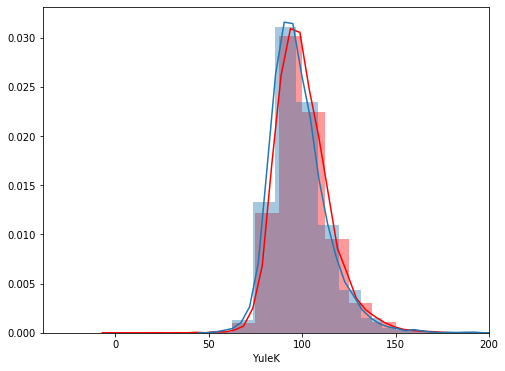

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(data[data.sexe == 2].YuleK,color = 'red')
sns.distplot(data[data.sexe == 1].YuleK)
plt.xlim(right=200)
#distribution presque identique.. Pas trop de diff la dessus

(-99.75506265283607, 300)

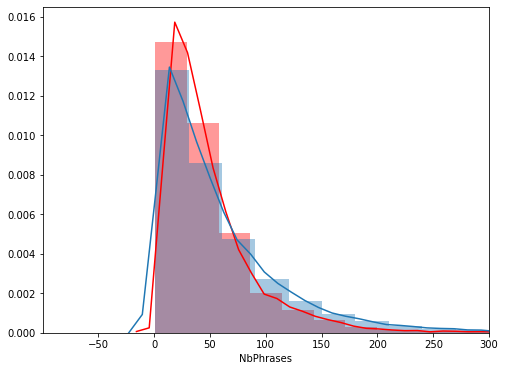

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(data[data.sexe == 2].NbPhrases,color = 'red')
sns.distplot(data[data.sexe == 1].NbPhrases)
plt.xlim(right=300)

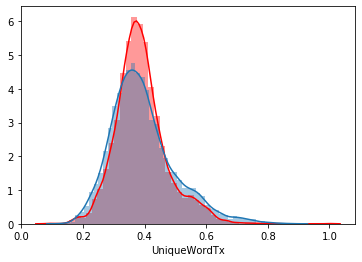

In [20]:
sns.distplot(data[data.sexe == 2].UniqueWordTx,color = 'red')
sns.distplot(data[data.sexe == 1].UniqueWordTx)

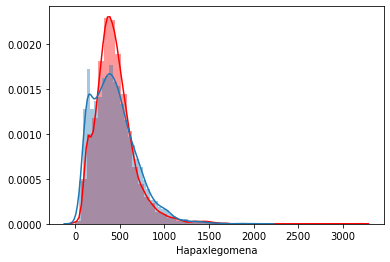

In [21]:
sns.distplot(data[data.sexe == 2].Hapaxlegomena,color = 'red')
sns.distplot(data[data.sexe == 1].Hapaxlegomena)

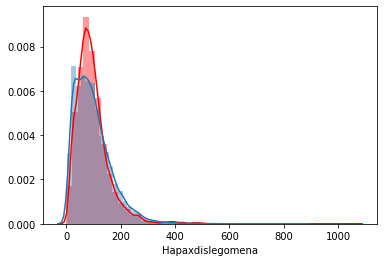

In [22]:
sns.distplot(data[data.sexe == 2].Hapaxdislegomena,color = 'red')
sns.distplot(data[data.sexe == 1].Hapaxdislegomena)

Rien que sur l'ensemble des 'variables structurels' il semble exister des différences notables entre les femmes et les hommes

In [27]:
df.sexe.fillna(0,inplace=True)

In [28]:
df.sexe.value_counts()/len(df)

1.0    0.707715
2.0    0.179496
0.0    0.112789
Name: sexe, dtype: float64

In [ ]:
df.sexe.value_counts()

In [30]:
print(round(500*0.707715))

354


In [34]:
min_df = pd.concat([df[df.sexe == 1].sample(354),df[df.sexe == 0].sample(146)])

In [36]:
len(min_df)
min_df.to_csv('minimal_df.csv')

Petit pavé de fonction

In [73]:
import nltk 
sent_detector = nltk.data.load('tokenizers/punkt/french.pickle')
from collections import Counter
def encode(x):
    if x == 1:
        return 0
    else:
        return 1
def tokenize(x):
    from nltk import word_tokenize
    tokens = word_tokenize(x.lower())
    return tokens
def count_punct(tokens):
    import string
    pct = string.punctuation +'...'+'\x92'+'«'+'»'+'``'
    cpt = 0
    for x in tokens:
        if x in pct:
            cpt+=1
    return cpt
def clean_punt(tokens):
    import string
    pct = string.punctuation +'...'+'\x92'+'«'+'»'+'``'+"''"
    return [word for word in tokens if word not in pct]
def count_stopwords(tokens):
    stopWords = set(stopwords.words('french'))
    return len([word for word in tokens if word in stopWords])
def clean_stopwords(tokens):
    stopWords = list(stopwords.words('french'))+['a','aussi','la','le','les','comme','si']
    return [word for word in tokens if word not in stopWords]
def Hapaxlegomena(tokens):
    s = pd.DataFrame(Counter(tokens).items(),columns=['Mot','nb'])
    return len(s[s.nb ==1])
def Hapaxdislegomena(tokens):
    s = pd.DataFrame(Counter(tokens).items(),columns=['Mot','nb'])
    return len(s[s.nb ==2])
def get_yules(tokens):
    """ 
    Retourne yule's k
    (cf. Oakes, M.P. 1998. Statistics for Corpus Linguistics.
    International Journal of Applied Linguistics, Vol 10 Issue 2)
    """
    try:
        token_counter = Counter(tok.upper() for tok in tokens)
        m1 = sum(token_counter.values())
        m2 = sum([freq ** 2 for freq in token_counter.values()])
        i = (m1*m1) / (m2-m1)
        k = 1/i * 10000
        return k
    except:
        return 0

In [94]:
min_df['Token']=min_df.Texte.apply(tokenize)
min_df['NbCarac'] = min_df.Texte.apply(len)
min_df['NbPhrases'] = min_df.Texte.apply(lambda x:len(sent_detector.tokenize(x)))
min_df['NbPunct'] = min_df.Token.apply(count_punct)
min_df['TokenClean']=min_df.Token.apply(clean_stopwords)
min_df['TokenClean']= min_df.TokenClean.apply(clean_punt)
min_df['NbWord']=min_df.TokenClean.apply(len)
min_df['UniqueWord']= min_df.TokenClean.apply(lambda x:len(set(x)))
min_df['UniqueWordTx']= min_df.TokenClean.apply(lambda x:len(set(x))/len(x))
min_df['NbStopWords']=min_df.Token.apply(count_stopwords)
min_df['Hapaxlegomena']=min_df.TokenClean.apply(Hapaxlegomena)
min_df['Hapaxdislegomena']= min_df.TokenClean.apply(Hapaxdislegomena)
min_df['YuleK']=min_df.Token.apply(get_yules)

In [85]:
from functools import reduce
from operator import add
m = min_df.TokenClean
arr = m.array
arr_m =  reduce(add,arr)

In [86]:
cm=Counter(arr_m)
dm = pd.DataFrame(cm, index=['occurrences']).transpose().reset_index()
dm.columns=['word', 'occurences']
dm = dm.sort_values('occurences', ascending=False)

Beaucoup de reclean à faire une fois que j'aurais relancé le scrapper complétement.
Doit on considérer les gallismes comme "c'est" = des stopwords?

## Spacy POS

In [88]:
import spacy
nlp = spacy.load('fr_core_news_md')

In [89]:
def extractPos(x):
    doc = nlp(x)
    lst_pos = [token.pos_ for token in doc]
    c = Counter(lst_pos)
    return [c['NOUN'],c['DET'],c['PUNCT'],c['ADJ'],c['ADP'],c['PRON'],c['VERB'],c['CCONJ'],c['NUM'],c['PROPN'],c['ADV'],c['SCONJ'],c['AUX'],c['INTJ']]

In [91]:
min_df['NbNom'],min_df['NbDet'],min_df['NbPunct'],min_df['NbAdj'],min_df['NbAdp'],min_df['NbPron'],min_df['NbVerb'],min_df['NbCconj'],min_df['NbNum'],min_df['NbPropn'],min_df['NbAdv'],min_df['NbSCONJ'],min_df['NbAUX'],min_df['NbIntj']=zip(*min_df.Texte.apply(extractPos))

In [95]:
min_df

,Id,Titre,Prenom,Nom,Fonction,Date,Tags,Texte,Lien,Type,...,NbIntj,NbCarac,NbPhrases,NbWord,UniqueWord,UniqueWordTx,NbStopWords,Hapaxlegomena,Hapaxdislegomena,YuleK
70472,130273,"Déclaration de M. Pierre Moscovici, ministre d...",Pierre,Moscovici,an,1997-11-18T12:00:00Z,"Union européenne,Politique agricole commune",Le hasard fait que je suis amené à vous répond...,https://www.vie-publique.fr/discours/130273-de...,déclaration,...,0,2988,22,261,195,0.747126,212,157,23,160.541534
58799,128362,"Interview de M. Jacques Chirac, Président de l...",Jacques,Chirac,an,2002-04-18T12:00:00Z,NaN,J.-P. Elkabbach - Monsieur le candidat à l'Ely...,https://www.vie-publique.fr/discours/128362-in...,interview,...,0,11079,75,959,609,0.635036,806,437,104,129.472693
76490,154402,Conseil des ministres du 07 Février 1990 La po...,Michel,Rocard,an,1990-02-07T12:00:00Z,"Société - Population,Insertion sociale",Le Premier ministre a présenté au Conseil des ...,https://www.vie-publique.fr/discours/154402-co...,conseil,...,0,1484,2,128,116,0.906250,89,106,8,103.290296
22541,185459,"Déclaration de M. Laurent Fabius, ministre des...",Laurent,Fabius,an,2012-07-06T12:00:00Z,"Relations internationales,Relations bilatérale...","Chers Amis,Messieurs les Premiers Ministres,Me...",https://www.vie-publique.fr/discours/185459-de...,déclaration,...,0,8872,39,788,565,0.717005,584,436,80,118.908030
17431,191101,"Déclaration de M. François Hollande, Président...",François,Hollande,an,2014-05-13T12:00:00Z,"Relations internationales,Relations bilatérale...","« Monsieur le Président, Mesdames, Messieurs, ...",https://www.vie-publique.fr/discours/191101-de...,déclaration,...,0,8784,42,748,492,0.657754,620,373,73,123.751020
56750,135221,Déclaration de M. Dominique Galouzeau de Ville...,Dominique,de Villepin,an,2003-01-08T12:00:00Z,"Relations internationales,Relations bilatérale...",Je suis évidemment particulièrement heureux de...,https://www.vie-publique.fr/discours/135221-de...,déclaration,...,0,6205,32,533,325,0.609756,437,240,41,137.566798
7952,202016,"Déclaration de M. François Hollande, Président...",François,Hollande,an,2017-01-28T12:00:00Z,"Union européenne,Construction européenne",Je voudrais d'abord remercier Antonio COSTA po...,https://www.vie-publique.fr/discours/202016-de...,déclaration,...,0,5081,24,431,295,0.684455,378,220,52,111.979714
37048,169012,"Déclaration de M. Nicolas Sarkozy, Président d...",Nicolas,Sarkozy,an,2007-12-19T12:00:00Z,"Emploi - Travail,Politique de l'emploi",J'ai tenu à réunir ici à la Présidence l'ensem...,https://www.vie-publique.fr/discours/169012-de...,déclaration,...,0,14870,103,1298,757,0.583205,1017,520,124,100.312316
35381,171034,"Déclaration de M. Bernard Kouchner, ministre d...",Bernard,Kouchner,an,2008-05-27T12:00:00Z,"Union européenne,Construction européenne","Merci Monsieur le Président,Ce sujet est diffi...",https://www.vie-publique.fr/discours/171034-de...,déclaration,...,1,14934,120,1370,760,0.554745,1028,541,107,114.021959
44377,160862,"Déclaration de M. Christian Estrosi, ministre ...",Christian,Estrosi,an,2006-03-06T12:00:00Z,"Emploi - Travail,Temps de travail",Vous ne pouvez pas imaginer à quel point je su...,https://www.vie-publique.fr/discours/160862-de...,déclaration,...,0,8815,91,780,538,0.689744,587,414,73,127.866832
